**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

# import data 2C_weka.csv for 2 Class Classifcation.


In [24]:
df= pd.read_csv('2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [4]:
df.describe()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
count        310.000000           310.000000             310.000000   
mean          60.496653            17.542822              51.930930   
std           17.236520            10.008330              18.554064   
min           26.147921            -6.554948              14.000000   
25%           46.430294            10.667069              37.000000   
50%           58.691038            16.357689              49.562398   
75%           72.877696            22.120395              63.000000   
max          129.834041            49.431864             125.742385   

       sacral_slope  pelvic_radius  degree_spondylolisthesis  
count    310.000000     310.000000                310.000000  
mean      42.953831     117.920655                 26.296694  
std       13.423102      13.317377                 37.559027  
min       13.366931      70.082575                -11.058179  
25%       33.347122     110.709196                  1.603727  
50%       42.404912     118.268178                 11.767934  
75%       52.695888     125.467674                 41.287352  
max      121.429566     163.071041                418.543082

In [5]:
df.head(10)

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   
5         40.250200            13.921907              25.124950     26.328293   
6         53.432928            15.864336              37.165934     37.568592   
7         45.366754            10.755611              29.038349     34.611142   
8         43.790190            13.533753              42.690814     30.256437   
9         36.686353             5.010884              41.948751     31.675469   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  
5     130.327871                  2.230652  Abnormal  
6     120.567523                  5.988551  Abnormal  
7     117.270068                -10.675871  Abnormal  
8     125.002893                 13.289018  Abnormal  
9      84.241415                  0.664437  Abnormal

In [6]:
df.tail(10)

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
300         50.676677             6.461501              35.000000   
301         89.014875            26.075981              69.021259   
302         54.600316            21.488974              29.360216   
303         34.382299             2.062683              32.390820   
304         45.075450            12.306951              44.583177   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis   class  
300     44.215175     116.587970                 -0.214711  Normal  
301     62.938894     111.481075                  6.061508  Normal  
302     33.111342     118.343321                 -1.471067  Normal  
303     32.319617     128.300199                 -3.365516  Normal  
304     32.768499     147.894637                 -8.941709  Normal  
305     34.286877     117.449062                 -4.245395  Normal  
306     33.215251     114.365845                 -0.421010  Normal  
307     38.751628     125.670725                 -2.707880  Normal  
308     36.559635     118.545842                  0.214750  Normal  
309     28.767649     123.945244                 -0.199249  Normal

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None


In [21]:
df['class'].unique()

array([0, 1])

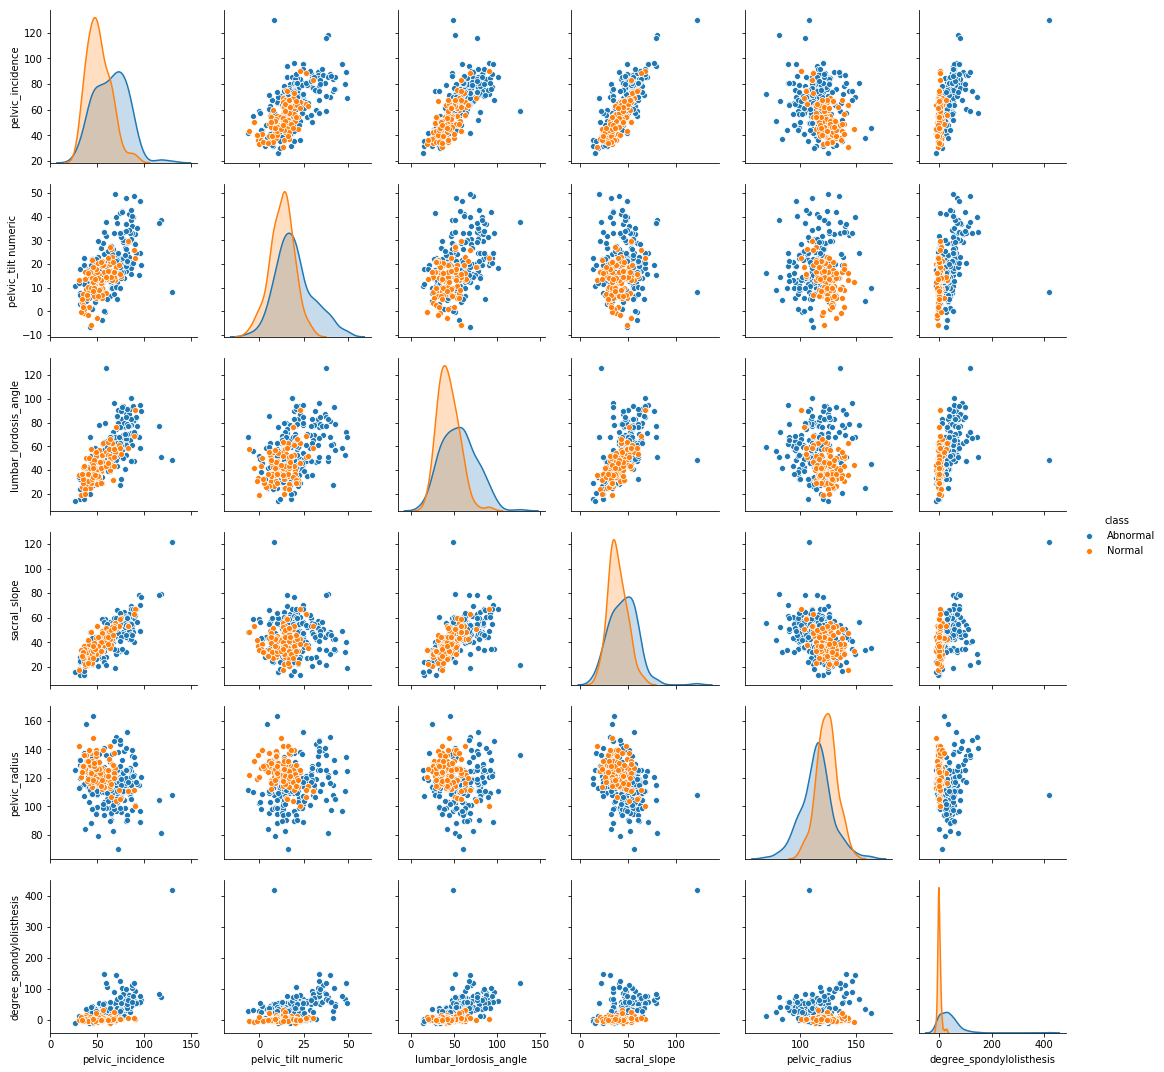

In [25]:
sns.pairplot(df, hue="class")

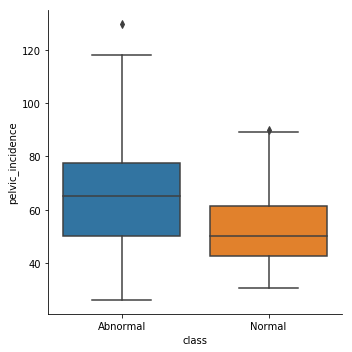

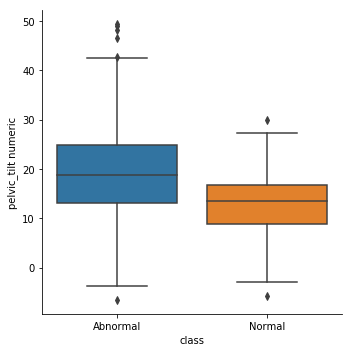

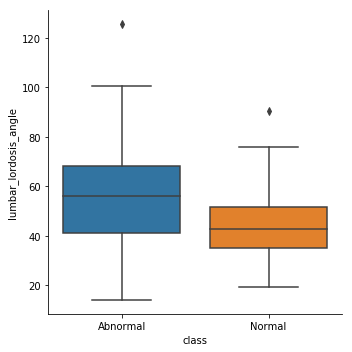

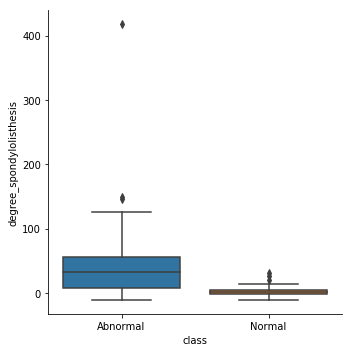

In [15]:
sns.catplot(x="class", y="pelvic_incidence", kind="box", data=df)
sns.catplot(x="class", y="pelvic_tilt numeric", kind="box", data=df)
sns.catplot(x="class", y="lumbar_lordosis_angle", kind="box", data=df)
sns.catplot(x="class", y="degree_spondylolisthesis", kind="box", data=df)

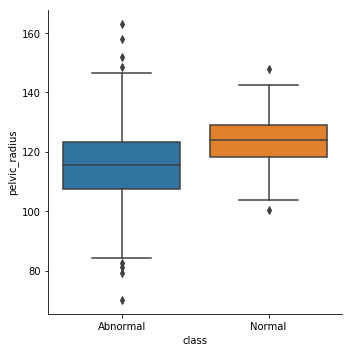

In [13]:
sns.catplot(x="class", y="pelvic_radius", kind="box", data=df)

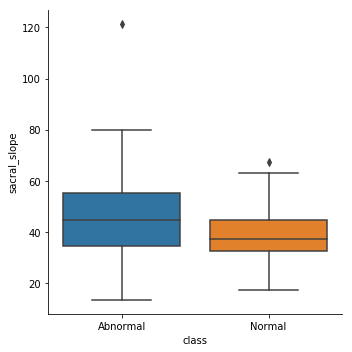

In [14]:
sns.catplot(x="class", y="sacral_slope", kind="box", data=df)

# Encode the Class variable to integer.

In [26]:
from sklearn.preprocessing import LabelEncoder
num=LabelEncoder()
df['class']= num.fit_transform(df['class'])

In [27]:
df['class'].unique()

array([0, 1])

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [28]:
X = df.drop(columns='class', inplace=False)
Y = df['class']

# Normalize your Data (X) to get values between 0 to 1.

In [42]:
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

In [43]:
print(scaledX_train)
print(scaledX_test)

[[ 1.65634947  0.83870647  0.8970597   1.46254302 -0.49534964 -0.53554062]
 [-0.62892421 -0.41672853 -0.96345011 -0.48209728  0.06554056 -0.61006733]
 [-1.15129533 -1.17490447 -0.51076125 -0.57542069 -1.09131747  0.0060718 ]
 ...
 [ 1.34453129  0.26213741  1.3324959   1.49924569  0.53057429  1.0497205 ]
 [-0.90597205 -0.68223487 -1.25515654 -0.63340254 -0.07110332 -0.95524846]
 [ 0.20618285  0.86376244 -0.07520481 -0.38388486 -0.88400368 -0.60934672]]
[[ 9.64934475e-01 -8.83662209e-02 -1.38906944e-01  1.28203778e+00
  -5.53295897e-01  3.10166334e-01]
 [ 1.52915577e-01 -3.48696532e-01 -2.27117099e-01  4.52610663e-01
  -4.63475585e-01  1.09491020e-01]
 [ 3.23598067e+00  1.97436699e+00  1.31577691e+00  2.60707567e+00
  -9.92403023e-01  1.34861122e+00]
 [-1.29746004e+00 -4.15268693e-01 -1.14956400e+00 -1.32579120e+00
   3.60485447e-01 -6.51701109e-01]
 [ 5.79835944e-01  4.04714637e-01  3.67382917e-01  4.29181460e-01
  -1.11627290e+00  9.82997627e-03]
 [-2.75665497e-01 -4.48867818e-01  5.53

# Split the dat as train and test with a ratio of 70:30.

In [31]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=40)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [36]:
sc=StandardScaler()
knn=KNeighborsClassifier(n_neighbors=4)
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,Y_train)
print("What is the Testing Accuracy")
print(knn.score(scaledX_test,Y_test))
print("What is the Training Accuracy")
print(knn.score(scaledX_train,Y_train))

What is the Testing Accuracy
0.8548387096774194
What is the Training Accuracy
0.8870967741935484


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [38]:
print("What is the Testing Accuracy")
print(knn.score(scaledX_test,Y_test))

What is the Testing Accuracy
0.8548387096774194


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

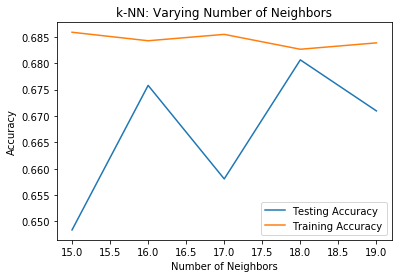

In [41]:
## first selected neighbors 1 to 50 and then to xoom the graph, only ran it from 15 to 20
neighbors = np.arange(15, 20)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(10):
        X_Train, X_Test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,Y_train)
        train.append(knn.score(scaledX_train,Y_train))
        test.append(knn.score(scaledX_test,Y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [0]:
##so value of k chosen =18 due to closest gap in between both lines

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [44]:
df1= pd.read_csv('3Classdata.csv')

In [45]:
df1.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [46]:
df1.describe()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count        310.000000   310.000000             310.000000    310.000000   
mean          60.496653    17.542822              51.930930     42.953831   
std           17.236520    10.008330              18.554064     13.423102   
min           26.147921    -6.554948              14.000000     13.366931   
25%           46.430294    10.667069              37.000000     33.347122   
50%           58.691038    16.357689              49.562398     42.404912   
75%           72.877696    22.120395              63.000000     52.695888   
max          129.834041    49.431864             125.742385    121.429566   

       pelvic_radius  degree_spondylolisthesis  
count     310.000000                310.000000  
mean      117.920655                 26.296694  
std        13.317377                 37.559027  
min        70.082575                -11.058179  
25%       110.709196                  1.603727  
50%       118.268178                 11.767934  
75%       125.467674                 41.287352  
max       163.071041                418.543082

In [47]:
df1.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [48]:
df1.head(10)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027818    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   
5         40.250200    13.921907              25.124950     26.328293   
6         53.432928    15.864336              37.165934     37.568592   
7         45.366754    10.755611              29.038349     34.611142   
8         43.790190    13.533753              42.690814     30.256437   
9         36.686353     5.010884              41.948751     31.675469   

   pelvic_radius  degree_spondylolisthesis   class  
0      98.672917                 -0.254400  Hernia  
1     114.405425                  4.564259  Hernia  
2     105.985135                 -3.530317  Hernia  
3     101.868495                 11.211523  Hernia  
4     108.168725                  7.918501  Hernia  
5     130.327871                  2.230652  Hernia  
6     120.567523                  5.988551  Hernia  
7     117.270068                -10.675871  Hernia  
8     125.002893                 13.289018  Hernia  
9      84.241415                  0.664437  Hernia

In [49]:
df1.tail(10)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
300         50.676677     6.461501              35.000000     44.215175   
301         89.014875    26.075981              69.021259     62.938894   
302         54.600316    21.488974              29.360216     33.111342   
303         34.382299     2.062683              32.390820     32.319617   
304         45.075450    12.306951              44.583177     32.768499   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis   class  
300     116.587970                 -0.214711  Normal  
301     111.481075                  6.061508  Normal  
302     118.343321                 -1.471067  Normal  
303     128.300199                 -3.365516  Normal  
304     147.894637                 -8.941709  Normal  
305     117.449062                 -4.245395  Normal  
306     114.365845                 -0.421010  Normal  
307     125.670725                 -2.707880  Normal  
308     118.545842                  0.214750  Normal  
309     123.945244                 -0.199249  Normal

In [52]:
df1['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [57]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None


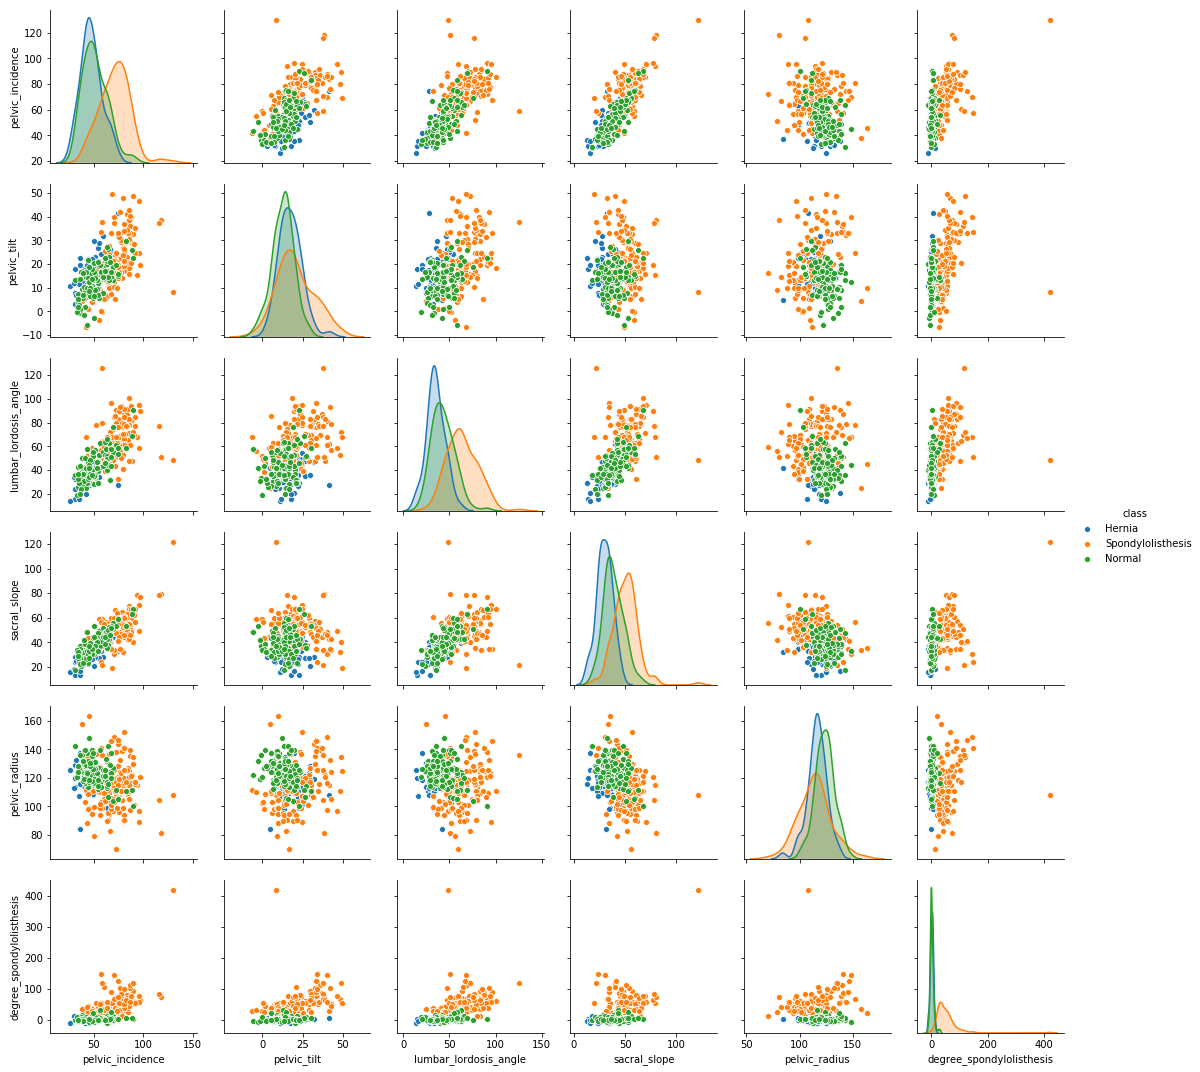

In [58]:
sns.pairplot(df1, hue="class")

ValueError: Could not interpret input 'pelvic_tilt numeric'

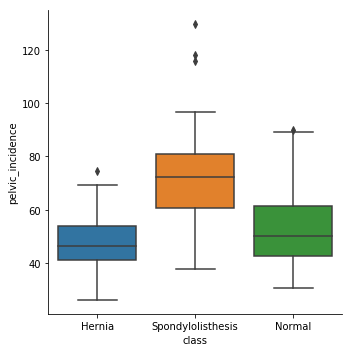

In [59]:
sns.catplot(x="class", y="pelvic_incidence", kind="box", data=df1)
sns.catplot(x="class", y="pelvic_tilt numeric", kind="box", data=df1)
sns.catplot(x="class", y="lumbar_lordosis_angle", kind="box", data=df1)
sns.catplot(x="class", y="degree_spondylolisthesis", kind="box", data=df1)

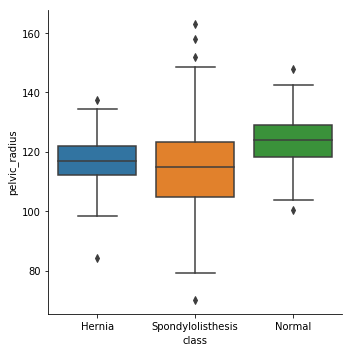

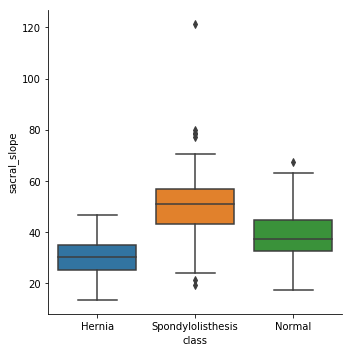

In [60]:
sns.catplot(x="class", y="pelvic_radius", kind="box", data=df1)
sns.catplot(x="class", y="sacral_slope", kind="box", data=df1)

In [61]:
from sklearn.preprocessing import LabelEncoder
num=LabelEncoder()
df1['class']= num.fit_transform(df1['class'])

In [63]:
df1['class'].unique()

array([0, 2, 1])

In [64]:
X = df1.drop(columns='class', inplace=False)
Y = df1['class']

In [65]:
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

In [66]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=40)

In [67]:
sc=StandardScaler()
knn=KNeighborsClassifier(n_neighbors=4)
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,Y_train)
print("What is the Testing Accuracy")
print(knn.score(scaledX_test,Y_test))
print("What is the Training Accuracy")
print(knn.score(scaledX_train,Y_train))

What is the Testing Accuracy
0.8225806451612904
What is the Training Accuracy
0.8629032258064516


In [68]:
print("What is the Testing Accuracy")
print(knn.score(scaledX_test,Y_test))

What is the Testing Accuracy
0.8225806451612904


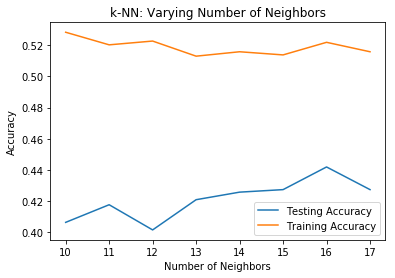

In [72]:
# first run the beow with neighbors 1 to 17
#Also, selecting k as maximum n^ 1/2, so it should not exceed 17
neighbors = np.arange(10, 18)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(10):
        X_Train, X_Test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,Y_train)
        train.append(knn.score(scaledX_train,Y_train))
        test.append(knn.score(scaledX_test,Y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# in this case, the value of k= 16